In [1]:
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


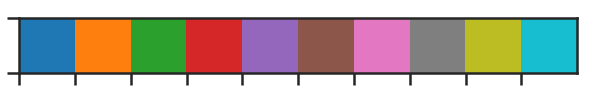

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an, stimulation, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)




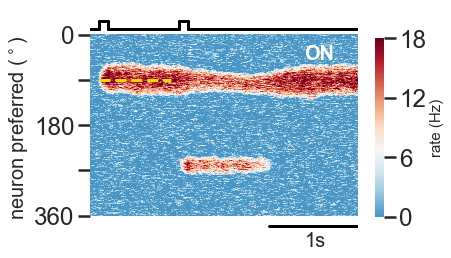

In [39]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_1, stimulation='ON', order=1)
plt.show()

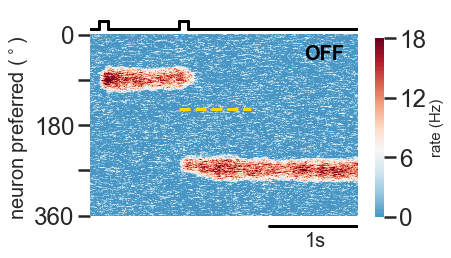

In [43]:
##new conductances R2
fee=0.95
fei=1.22
fie=0.92
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


on_close_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_close_2, stimulation='OFF', order=2)

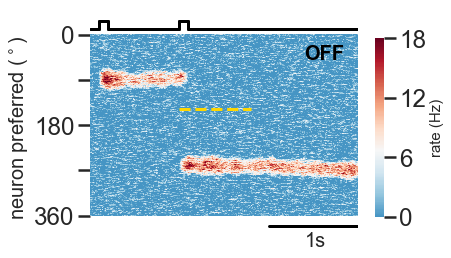

In [45]:
#typical R2 parameters
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'

on_far_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_far_2, stimulation='OFF', order=2)

## Remember 2nd, previous results

In [41]:
err2_on_f = pd.read_excel('err2_on_f51.xlsx')
err2_off_f = pd.read_excel('err2_off_f51.xlsx')

err2_on_fd = err2_on_f.copy()
err2_on_fd['err'] = err2_on_fd['err']*-1
err2_on_f = pd.concat([err2_on_f, err2_on_fd])

#
err2_off_fd = err2_off_f.copy()
err2_off_fd['err'] = err2_off_fd['err']*-1
err2_off_f = pd.concat([err2_off_f, err2_off_fd])


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


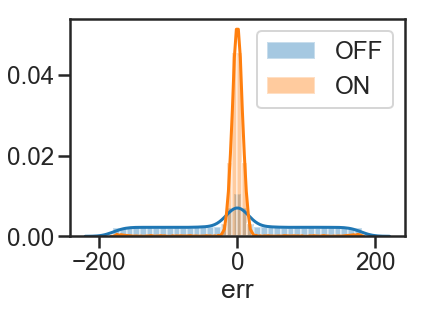

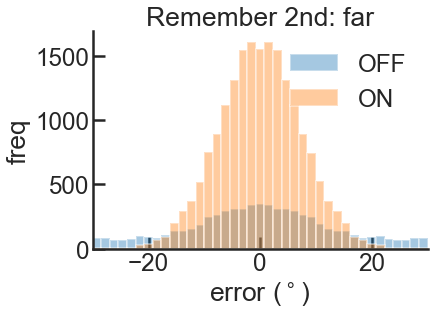

In [42]:
outlier_lim=60

sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.show()

err2_on_f_o = err2_on_f.loc[err2_on_f['abs_err']< outlier_lim]
err2_off_f_o = err2_off_f.loc[err2_off_f['abs_err']<outlier_lim]

sns.distplot(err2_off_f_o.err, label='OFF', kde=False, bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()


### Simulations, Neuromodulation for higher rates

## OFF

In [ ]:
n_simuls=1000
numcores = multiprocessing.cpu_count() -2
print('Number cores: '+ str(numcores))

In [43]:
# fee=0.95
# fei=1.22
# fie=0.92
# fii=1.08

# r2_f_hf = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fii,
#            GEI=0.13*fei,
#            GIE=0.042*fie, 
#            sigE=7., sigI=5., k_noise=0.6,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 



In [74]:
r2_f_hf_df= pd.DataFrame([r2_f_hf[i][2] for i in range(len(r2_f_hf))])

r2_f_hf_df.columns=['err']
r2_f_hf_df['abs_err']=abs(r2_f_hf_df['err'])
r2_f_hf_df['stimulation']='OFF_h'
r2_f_hf_df['distance']='far'
r2_f_hf_df['order']='1st'

r2_f_hf_dfd = r2_f_hf_df.copy()
r2_f_hf_dfd['err'] = r2_f_hf_df['err']*-1
r2_hf = pd.concat([r2_f_hf_df, r2_f_hf_dfd])


#r2_hf.to_excel('r2_hf.xlsx')
r2_hf_o = r2_hf.loc[r2_hf['abs_err']< outlier_lim]


## ON

In [ ]:
# fee=0.95
# fei=1.22
# fie=0.92
# fii=1.08

# r2_f_on_hf = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fii,
#            GEI=0.13*fei,
#            GIE=0.042*fie, 
#            sigE=7., sigI=5., k_noise=0.6,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [93]:
r2_f_on_hf_df= pd.DataFrame([r2_f_on_hf[i][2] for i in range(len(r2_f_on_hf))])

r2_f_on_hf_df.columns=['err']
r2_f_on_hf_df['abs_err']=abs(r2_f_on_hf_df['err'])
r2_f_on_hf_df['stimulation']='ON_h'
r2_f_on_hf_df['distance']='far'
r2_f_on_hf_df['order']='2nd'

r2_f_on_hf_dfd = r2_f_on_hf_df.copy()
r2_f_on_hf_dfd['err'] = r2_f_on_hf_df['err']*-1
r2_on_hf = pd.concat([r2_f_on_hf_df, r2_f_on_hf_dfd])


r2_f_on_hf_df.to_excel('r2_on_hf.xlsx')
r2_on_hf_o = r2_on_hf.loc[r2_on_hf['abs_err']< outlier_lim]

## Comparisons

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


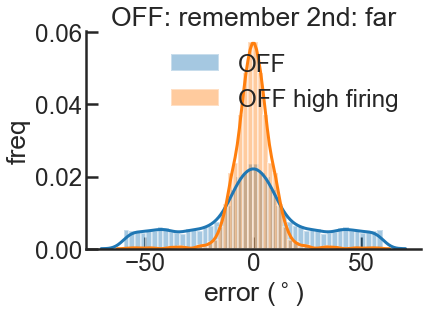

In [67]:
sns.distplot(err2_off_f_o.err, label='OFF', kde=True)#, bins=np.linspace(-30,30,40))
sns.distplot(r2_hf_o.err, label='OFF high firing', kde=True) #,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
#plt.xlim(-30,30)
plt.title('OFF: remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


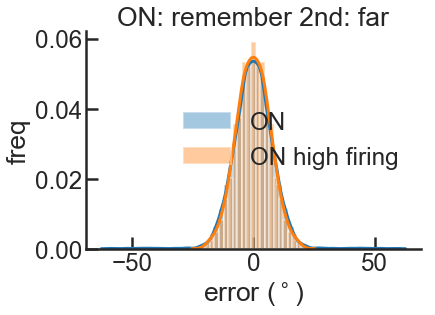

In [72]:
sns.distplot(err2_on_f_o.err, label='ON', kde=True)#, bins=np.linspace(-30,30,40))
sns.distplot(r2_on_hf_o.err, label='ON high firing', kde=True) #,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
#plt.xlim(-30,30)
plt.title('ON: remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

In [88]:
len(r2_hf_o)
len(r2_on_hf_o)

896

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


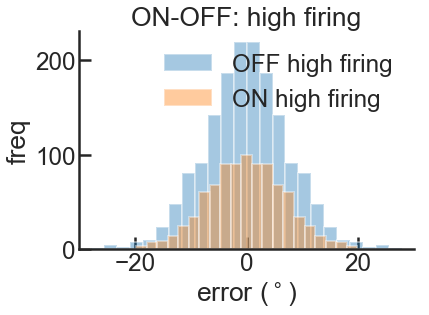

In [86]:
sns.distplot(r2_hf_o.err, label='OFF high firing', kde=False)#, bins=np.linspace(-30,30,40))
sns.distplot(r2_on_hf_o.err, label='ON high firing', kde=False) #,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('ON-OFF: high firing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

In [83]:
## Old performance

In [76]:
second = pd.concat([r2_on_hf_o, err2_on_f_o, err2_off_f_o, r2_hf_o])
second.stimulation.unique()

array(['ON_h', 'ON', 'OFF', 'OFF_h'], dtype=object)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


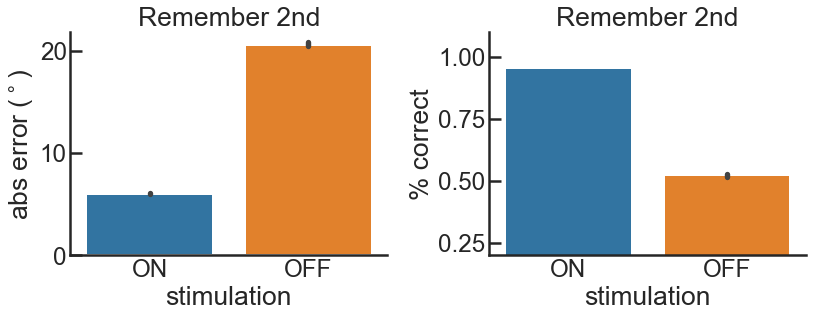

In [84]:
second['performance']=second['abs_err']<15

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='stimulation', y='abs_err', order=['ON', 'OFF'], 
            ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
#g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
#ax1.set_ylim(2,9)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])


g = sns.barplot(x='stimulation', y='performance', order=[ 'ON', 'OFF'], 
            ci=69, data=second, ax=ax2)
#g.legend_.remove()
ax2.set_ylabel(r'% correct')
ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
ax2.set_ylim(0.4, 1.1)
ax2.set_ylim(0.2, 1.1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


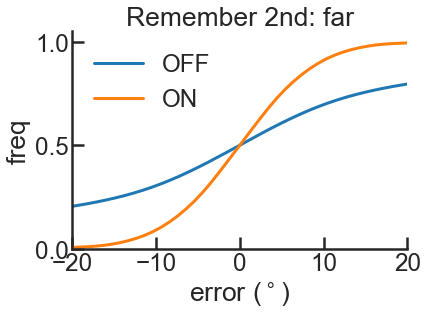

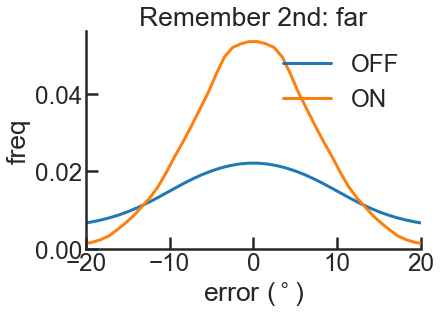

In [100]:
sns.distplot(err2_off_f_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':3})
sns.distplot(err2_on_f_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':3})


plt.legend( frameon=False)
#plt.xlim(-100,100)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.xlim(-20,20)
plt.show()


sns.distplot(err2_off_f_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-20,20)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

## New performance

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


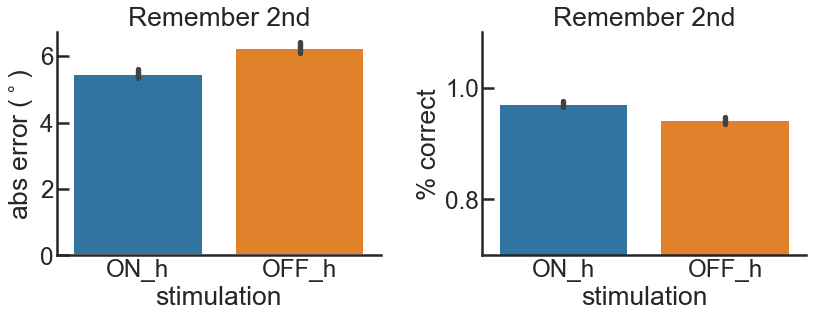

In [101]:
### FAR

second['performance']=second['abs_err']<15

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='stimulation', y='abs_err', order=['ON_h', 'OFF_h'], 
            ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
#g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
#ax1.set_ylim(2,9)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])


g = sns.barplot(x='stimulation', y='performance', order=[ 'ON_h', 'OFF_h'], 
            ci=69, data=second, ax=ax2)
#g.legend_.remove()
ax2.set_ylabel(r'% correct')
ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
ax2.set_ylim(0.4, 1.1)
ax2.set_ylim(0.7, 1.1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


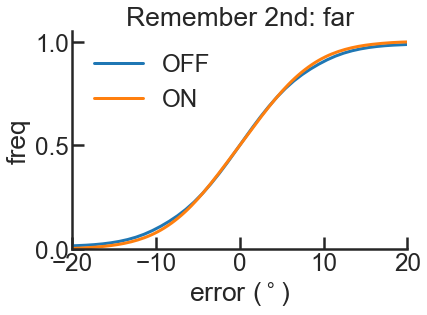

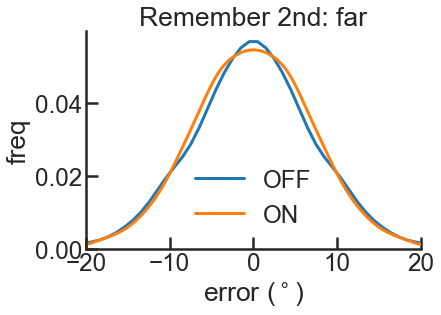

In [102]:
sns.distplot(r2_hf_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':3})
sns.distplot(r2_on_hf_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':3})


plt.legend( frameon=False)
#plt.xlim(-100,100)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.xlim(-20,20)
plt.show()


sns.distplot(r2_hf_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(r2_on_hf_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-20,20)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

## Expectation

Ejemplos y Curvas de tuning

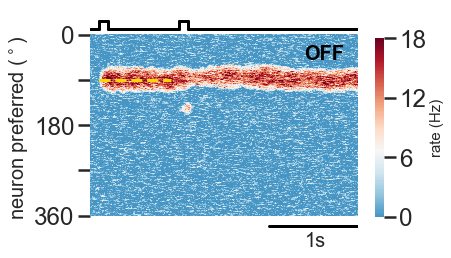

In [105]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

off_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(off_close_1, stimulation='OFF', order=1)
plt.show()

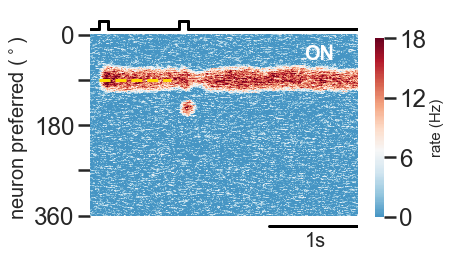

In [108]:
### ON as expectation
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2+3.55, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_1, stimulation='ON', order=1)
plt.show()

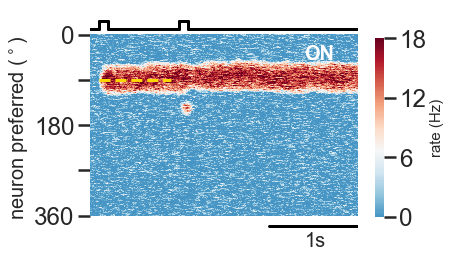

In [109]:
### ON normal
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_2, stimulation='ON', order=1)
plt.show()

In [145]:
## runing average for each time of one rimulation
l=[pd.DataFrame(off_close_1[4][:,i]).rolling(window=40, min_periods=1).mean().values for i in range(np.shape(off_close_1[4])[1])]
## put them in the same datfarame, column name= timepoint of the simultaion 
dff = pd.concat([pd.DataFrame(np.array(l[i])) for i in range(len(l))], axis=1)
dff.columns=[np.arange(0,len(l))]

In [146]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.659482,2.453245,2.384154,1.022288,1.387385,0.702628,-0.437579,0.739586,-0.370575,0.524904,...,2.739273,3.826017,2.846574,3.948132,3.160977,3.172201,1.918084,2.515230,2.501191,1.601837
1,-0.272363,0.283217,0.154364,-0.431955,0.888207,0.708778,0.271756,0.321875,-0.185537,0.563749,...,2.062151,2.261492,1.613307,1.936244,1.874155,1.985252,1.133053,2.206889,1.729674,1.262263
2,-0.595228,-0.232549,-0.009075,-1.114722,-0.110294,0.405357,0.441747,0.320578,-0.238149,0.481557,...,-0.108262,0.230347,-0.461741,-0.481741,-0.096290,0.497933,-0.247305,0.368755,-0.004325,0.104355
3,-0.689852,-0.399557,-0.096768,-1.031243,-0.407341,-0.629256,-0.037166,0.160206,-0.460233,0.074185,...,0.538793,0.686169,-0.116945,-0.233402,-0.297056,0.248369,-0.424340,0.265346,0.193247,0.388506
4,-0.419354,-0.153359,0.130113,-0.569267,-0.290541,-0.570507,-0.191805,-0.366432,-0.783436,-0.444167,...,0.565461,0.643654,-0.118805,-0.204999,-0.193956,0.211815,-0.352337,0.280487,0.228660,0.474898


In [122]:
off_close_f = pd.DataFrame([pd.DataFrame(off_close_1[4][:,i]).rolling(window=40, min_periods=1).mean().values for i in range(np.shape(off_close_1[4])[1])] )

ValueError: Must pass 2-d input

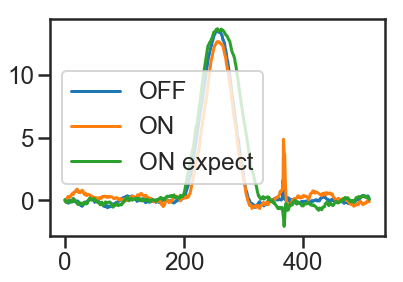

In [110]:
N=512
PA_off = pd.DataFrame(off_close_1[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on_close_1[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

PA_on2 = pd.DataFrame(on_close_2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on2 == max(PA_on2)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled2 = np.roll(PA_on2, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.plot(PA_on_rolled2, label='ON expect')

plt.legend()

## Simulations

In [20]:
n_simuls=1000
numcores = multiprocessing.cpu_count() -2
print('Number cores: '+ str(numcores))

Number cores: 6


In [21]:
# ON_expectation = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fii,
#            GEI=0.13*fei,
#            GIE=0.042*fie, 
#            sigE=7., sigI=5., k_noise=0.6,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=1.2+3.55, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 



In [36]:
err1_exp= pd.DataFrame([ON_expectation[i][1] for i in range(len(ON_expectation))])
#err1_exp.to_excel('err1_expect_ON.xlsx')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


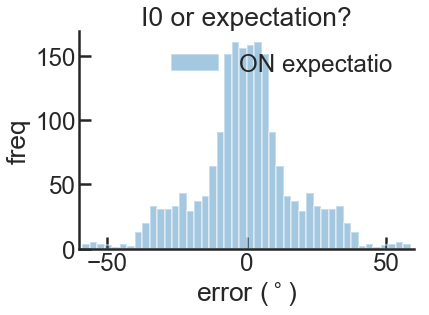

In [37]:
err1_exp= pd.DataFrame([ON_expectation[i][1] for i in range(len(ON_expectation))])
err1_exp.columns=['err']
err1_exp['abs_err']=abs(err1_exp['err'])
err1_exp['stimulation']='ON_exp'
err1_exp['distance']='close'
err1_exp['order']='1st'

err1_exp_cd = err1_exp.copy()
err1_exp_cd['err'] = err1_exp_cd['err']*-1
err1_exp = pd.concat([err1_exp, err1_exp_cd])

outlier_lim=60

err1_exp = err1_exp.loc[err1_exp['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]


sns.distplot(err1_exp.err, label='ON expectatio', kde=False)#,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('I0 or expectation?')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()



In [14]:
### PReviously done (OFF and ON normal)

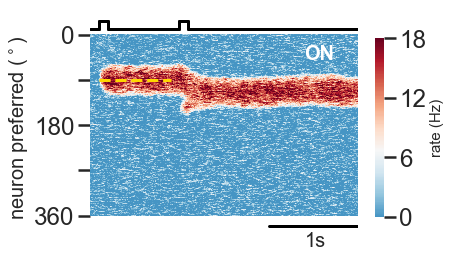

In [83]:
### ON memory I0
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_1, stimulation='ON', order=1)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


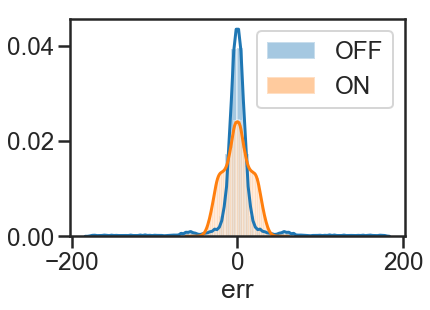

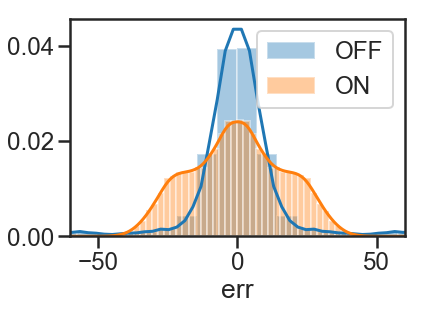

14.115109000000002 13.723072999999998
8.40973187791437 13.723072999999998


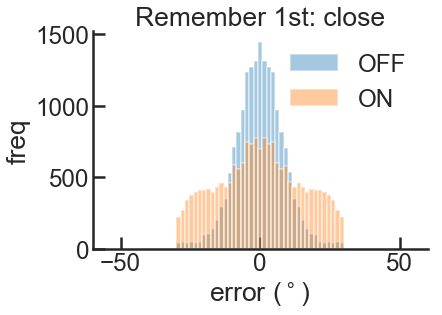

In [13]:
err1_on_c = pd.read_excel('err1_on_c51.xlsx') 
err1_off_c = pd.read_excel('err1_off_c51.xlsx')

err1_on_cd = err1_on_c.copy()
err1_on_cd['err'] = err1_on_cd['err']*-1
err1_on_c = pd.concat([err1_on_c, err1_on_cd])

#
err1_off_cd = err1_off_c.copy()
err1_off_cd['err'] = err1_off_cd['err']*-1
err1_off_c = pd.concat([err1_off_c, err1_off_cd])


outlier_lim=60

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.show()

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())


err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']< outlier_lim] #err1_off_c['abs_err'].mean() + 2*err1_off_c['abs_err'].std()]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]


print(err1_off_c_o.abs_err.mean(), err1_on_c_o.abs_err.mean())

sns.distplot(err1_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err1_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


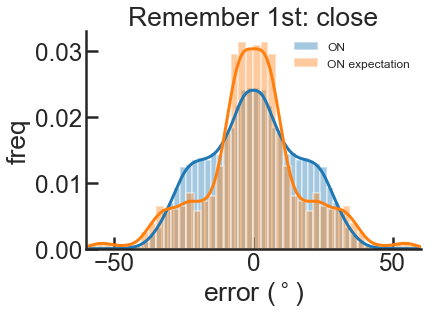

In [35]:
sns.distplot(err1_on_c_o.err, label='ON', kde=True)#,  bins=np.linspace(-30,30,40))
sns.distplot(err1_exp.err, label='ON expectation', kde=True)#,  bins=np.linspace(-30,30,20))
plt.legend( frameon=False, prop={'size': 12})
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


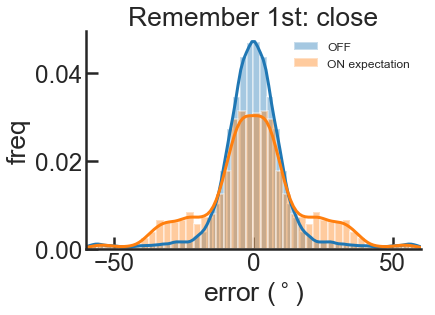

In [39]:
sns.distplot(err1_off_c_o.err, label='OFF', kde=True) #,  bins=np.linspace(-30,30,40))
sns.distplot(err1_exp.err, label='ON expectation', kde=True)#,  bins=np.linspace(-30,30,20))
plt.legend( frameon=False, prop={'size': 12})
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()